In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Question 8 Involving simple linear regression on auto data set (horsepower to mpg)

In [2]:
Auto = load_data("Auto")
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})
X

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150
4,1.0,140
...,...,...
387,1.0,86
388,1.0,52
389,1.0,84
390,1.0,79


In [4]:
y = Auto["mpg"]
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### we reject the null hypothesis due to the 0 p value

In [5]:
Auto["mpg"].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [6]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           7.03e-81
Time:                        12:41:17   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### correlation coeffictient(R^2) is quite high indicating a strong relationship


### The relationship between predictor and response is negative (higher horspower leads to lower mpg) since the coefficient is negative

In [7]:
design = MS(['horsepower'])
X = design.fit_transform(Auto)

In [8]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [9]:
new_predictions = model.fit().get_prediction(newX)
new_predictions.predicted_mean

array([24.46707715])

In [10]:
## confidence interval
new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [11]:
## prediction interval
new_predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

In [12]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

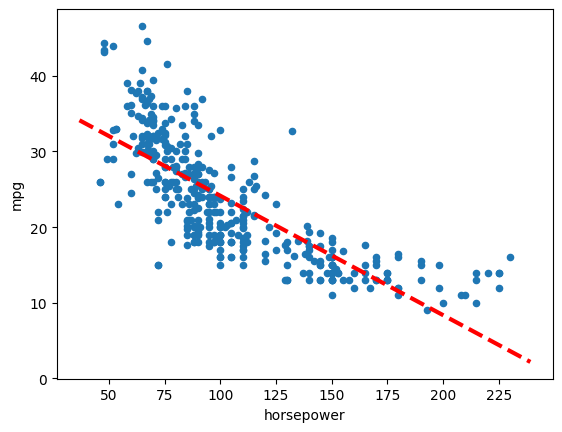

In [13]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       model.fit().params[0],
       model.fit().params[1],
       'r--',
       linewidth=3)

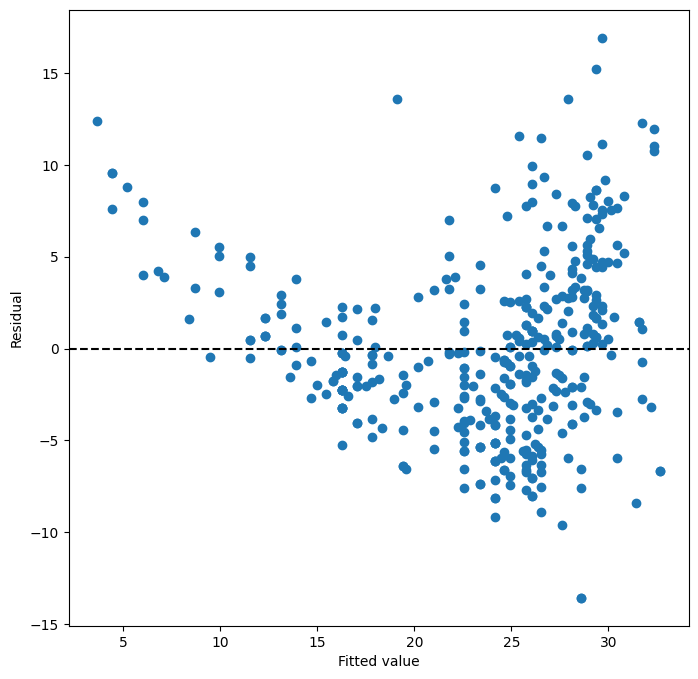

In [14]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(model.fit().fittedvalues, model.fit().resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Residuals plot might indicate some evidence of non-linearity due to a pattern in the scatter plot

115

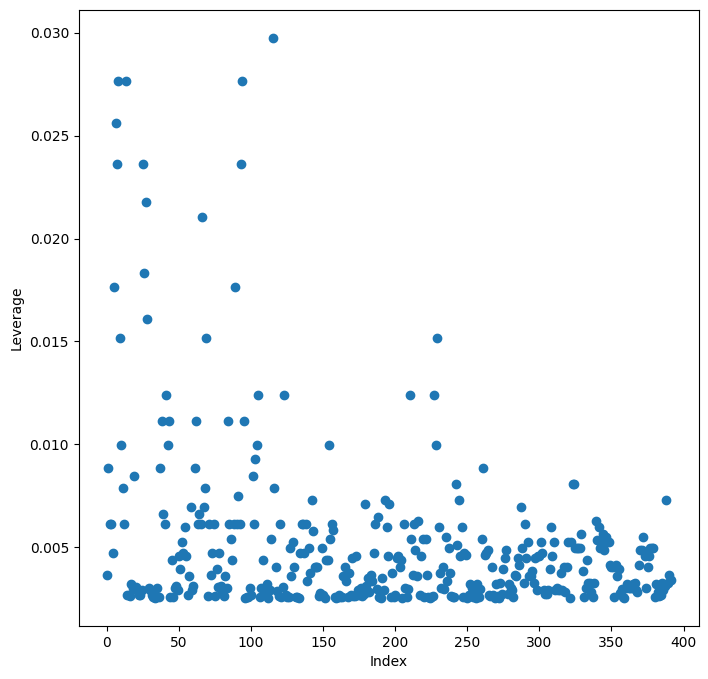

In [15]:
infl = model.fit().get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


## Multiple regression on auto data (see question 9 ISLP)

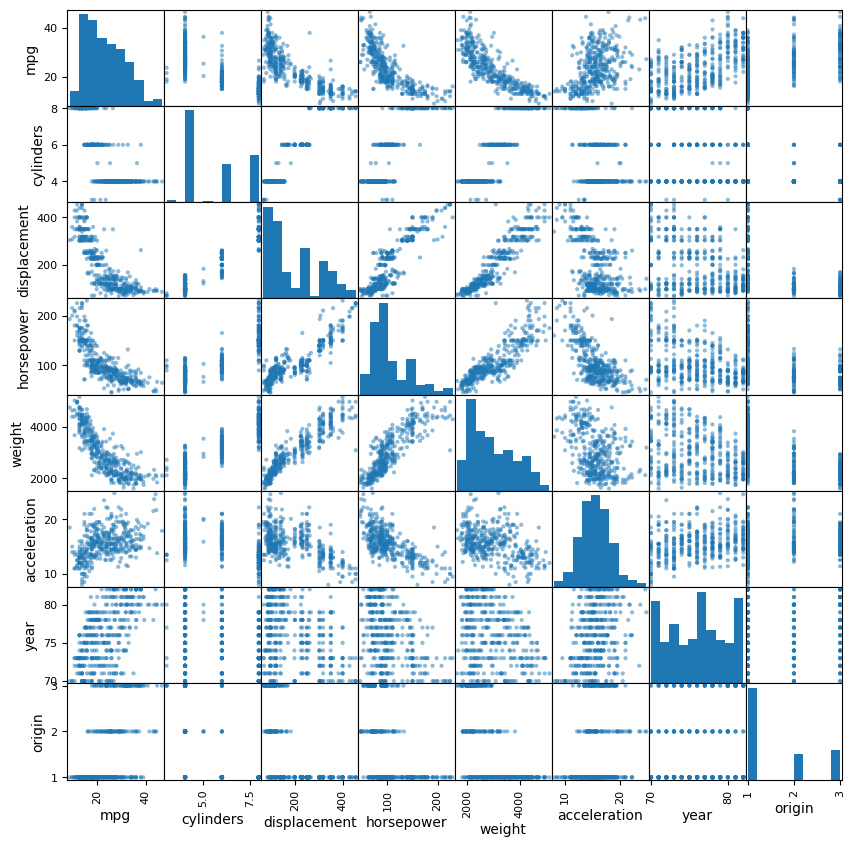

In [16]:
pd.plotting.scatter_matrix(Auto, figsize = (10,10));

In [17]:
Auto.corr()

C:\Users\jimbo\AppData\Local\Temp\ipykernel_8640\340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [18]:
terms = Auto.columns.drop(["mpg", "name"])
terms

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [19]:
X = MS(terms).fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


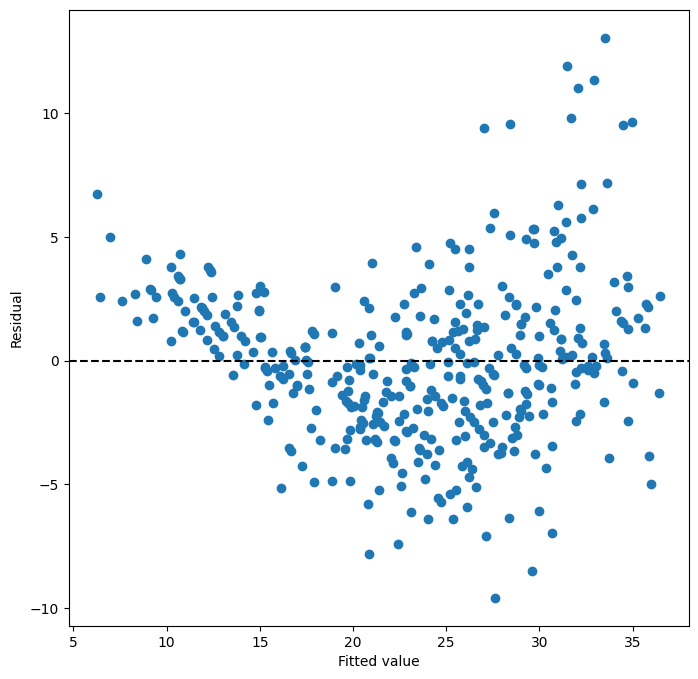

In [20]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, model.fit().resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [21]:
minus_acc = Auto.columns.drop(["mpg", "name", "acceleration"])
Xma = MS(minus_acc).fit_transform(Auto)
model1 = sm.OLS(y, Xma)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-15.5635,4.175,-3.728,0.000
cylinders,-0.5067,0.323,-1.570,0.117
displacement,0.0193,0.007,2.579,0.010
horsepower,-0.0239,0.011,-2.205,0.028
weight,-0.0062,0.001,-10.883,0.000
year,0.7475,0.051,14.717,0.000
origin,1.4282,0.278,5.138,0.000


,vif
cylinders,10.710150
displacement,21.608513
horsepower,6.147752
weight,8.324047
year,1.237304
origin,1.772234


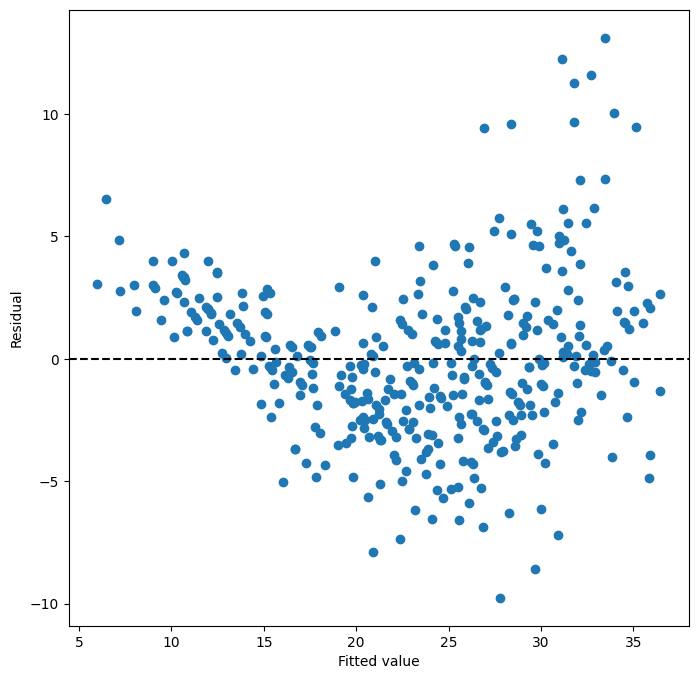

In [22]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues, results1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');
vals = [VIF(Xma, i)
        for i in range(1, Xma.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=Xma.columns[1:])
vif

In [23]:
minus_cyl = Auto.columns.drop(["mpg", "name", "acceleration", "cylinders"])
Xmc = MS(minus_cyl).fit_transform(Auto)
model2 = sm.OLS(y, Xmc)
results2 = model2.fit()
summarize(results2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     351.7
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          2.73e-141
Time:                        12:41:20   Log-Likelihood:                -1025.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     386   BIC:                             2086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -16.6939      4.120     -4.051      0.000     -24.795      -8.592
displacement     0.0114      0.006      2.054      0.041       0.000       0.022
horsepower      -0.0219      0.011     -2.033      0.043      -0.043      -0.001
weight          -0.0063      0.001    -11.124      0.000      -0.007      -0.005
year             0.7484      0.051     14.707      0.000       0.648       0.848
origin           1.3853      0.277      4.998      0.000       0.840       1.930
==============================================================================
Omnibus:                       34.200   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.468
Skew:                           0.552   Prob(JB):                     2.01e-13
Kurtosis:                       4.536   Cond. No.                     7.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,vif
displacement,11.815410
horsepower,6.064714
weight,8.208873
year,1.237146
origin,1.755107


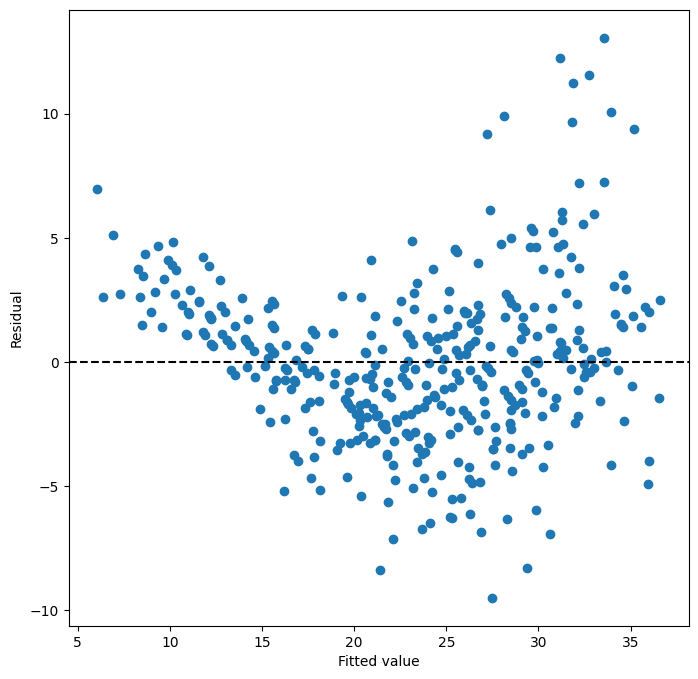

In [24]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');
vals = [VIF(Xmc, i)
        for i in range(1, Xmc.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=Xmc.columns[1:])
vif

In [25]:
best = Auto.columns.drop(["mpg", "name", "acceleration", "horsepower", "displacement", "weight"])
terms = [poly("horsepower", degree=2), poly("weight", degree=2)] + best.tolist()

In [26]:
design = MS(terms)
Xb = design.fit_transform(Auto)
modelb = sm.OLS(y, Xb)
resultsb = modelb.fit()
summarize(resultsb)

,coef,std err,t,P>|t|
intercept,-38.0627,3.685,-10.329,0.000
"poly(horsepower, degree=2)[0]",-26.0086,6.771,-3.841,0.000
"poly(horsepower, degree=2)[1]",18.5277,3.751,4.939,0.000
"poly(weight, degree=2)[0]",-83.9526,8.015,-10.475,0.000
"poly(weight, degree=2)[1]",21.2883,3.687,5.773,0.000
cylinders,0.1835,0.210,0.873,0.383
year,0.7817,0.045,17.440,0.000
origin,0.7032,0.241,2.923,0.004


In [27]:
anova_lm(results, results1, results2, resultsb)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,385.0,4259.570947,-1.0,-7.358417,0.865361,NaN
2,386.0,4286.842209,-1.0,-27.271262,3.207141,NaN
3,384.0,3265.264346,2.0,1021.577863,60.069547,2.004116e-23


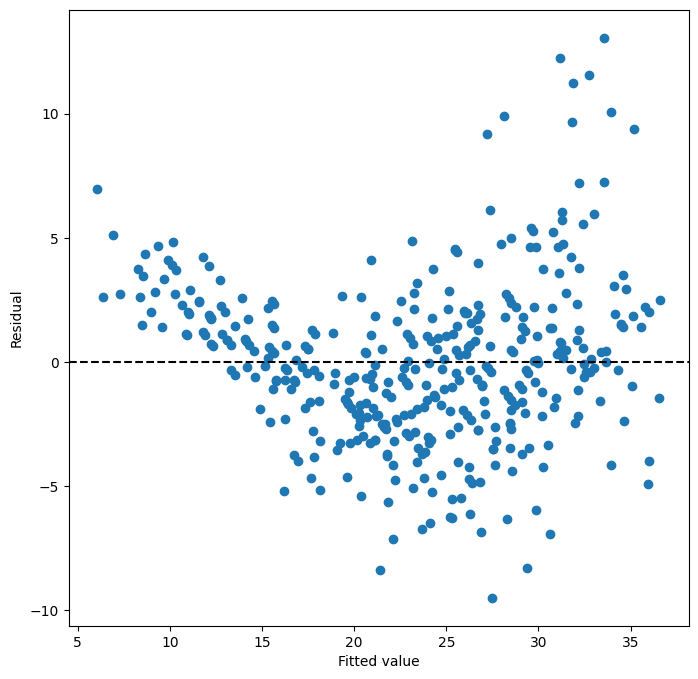

In [28]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

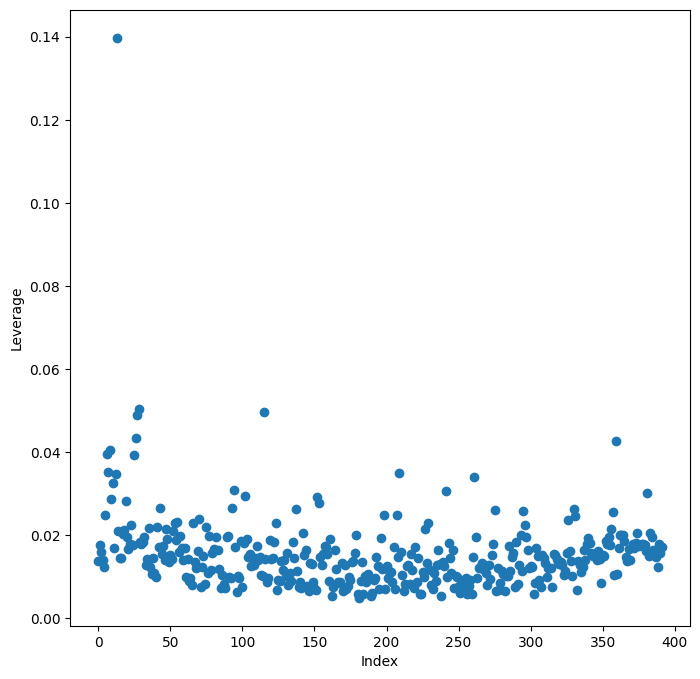

In [30]:
infl = results2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(Xb.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [31]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     351.7
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          2.73e-141
Time:                        12:42:11   Log-Likelihood:                -1025.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     386   BIC:                             2086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -16.6939      4.120     -4.051      0.000     -24.795      -8.592
displacement     0.0114      0.006      2.054      0.041       0.000       0.022
horsepower      -0.0219      0.011     -2.033      0.043      -0.043      -0.001
weight          -0.0063      0.001    -11.124      0.000      -0.007      -0.005
year             0.7484      0.051     14.707      0.000       0.648       0.848
origin           1.3853      0.277      4.998      0.000       0.840       1.930
==============================================================================
Omnibus:                       34.200   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.468
Skew:                           0.552   Prob(JB):                     2.01e-13
Kurtosis:                       4.536   Cond. No.                     7.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     294.6
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          1.58e-140
Time:                        12:42:15   Log-Likelihood:                -1023.8
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     385   BIC:                             2089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -15.5635      4.175     -3.728      0.000     -23.773      -7.354
cylinders       -0.5067      0.323     -1.570      0.117      -1.141       0.128
displacement     0.0193      0.007      2.579      0.010       0.005       0.034
horsepower      -0.0239      0.011     -2.205      0.028      -0.045      -0.003
weight          -0.0062      0.001    -10.883      0.000      -0.007      -0.005
year             0.7475      0.051     14.717      0.000       0.648       0.847
origin           1.4282      0.278      5.138      0.000       0.882       1.975
==============================================================================
Omnibus:                       35.376   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.123
Skew:                           0.559   Prob(JB):                     3.24e-14
Kurtosis:                       4.597   Cond. No.                     7.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
vals = [VIF(Xb, i)
        for i in range(1, Xb.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=Xb.columns[1:])
vif

,vif
"poly(horsepower, degree=2)[0]",5.391730
"poly(horsepower, degree=2)[1]",1.654937
"poly(weight, degree=2)[0]",7.554625
"poly(weight, degree=2)[1]",1.599105
cylinders,5.906196
year,1.253650
origin,1.726820


## Question 11: Carseat regression

In [34]:
Carseat = load_data("Carseats")
X = MS(["Price", "Urban", "US"]).fit_transform(Carseat)
y = Carseat["Sales"]
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


### When price increases by 1000 and other predictors are held constant, sales decrease by 54.459 unit sales. In otherwords, when price increases by 1000, the number of carseats sold decrease by 54,459.
### A store’s sale is not affected by whether or not it is in a Urban area### A store in the US sales 1200 more carseats (in average) than a store that is abroad.



### We can reject the null hypothesis for B_1 and B_3 (price and US)

In [35]:
Carseat = load_data("Carseats")
X1 = MS(["Price", "US"]).fit_transform(Carseat)
y = Carseat["Sales"]
model = sm.OLS(y,X1)
results1 = model.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


### Both models are relatively similair and mediocre at best

In [36]:
results1.conf_int(alpha=.05)
## coefficient confidence intervals

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


42

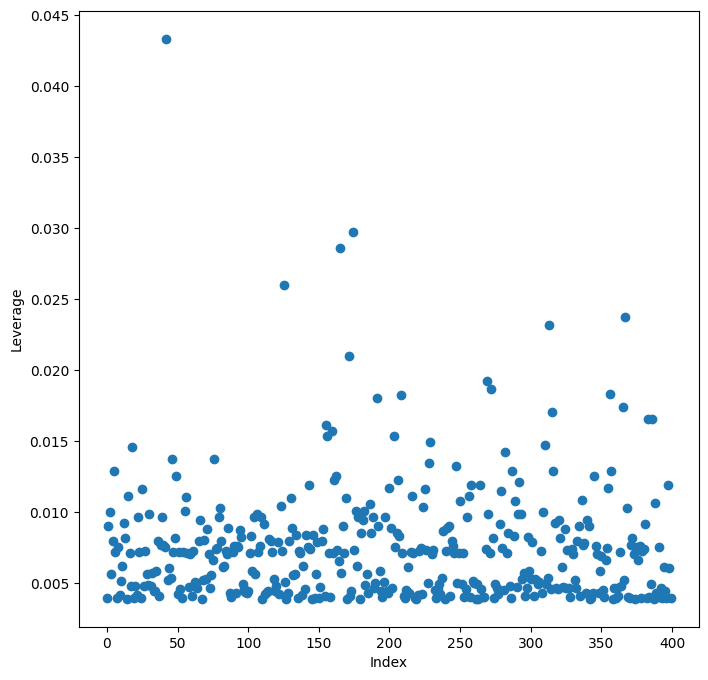

In [37]:
infl = results1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X1.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

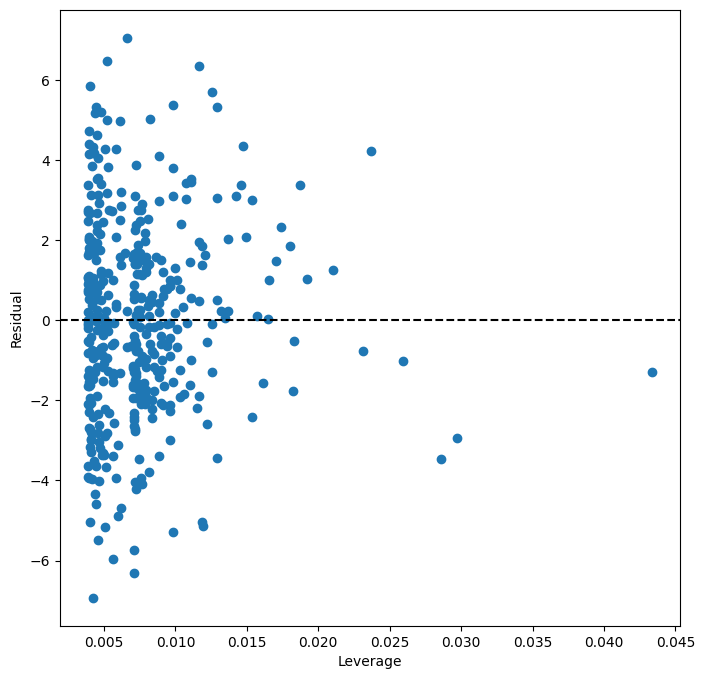

In [38]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(infl.hat_matrix_diag, results1.resid)
ax.set_xlabel('Leverage')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### No evidence of outliers but maybe 1 point with high leverage?

## Question 11 (regression no intercept)

In [39]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [40]:
X = pd.DataFrame({'x': x})

In [41]:
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


In [42]:
Y = pd.DataFrame({'y': y})

In [43]:
model = sm.OLS(x,Y)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


In [44]:
## note the t-statistic and p-value are the same

## Question 13

In [45]:
rng2 = np.random.default_rng(1)

In [46]:
x = rng2.normal(size=100)
eps = rng2.normal(scale=.25, size=100)

In [47]:
y = -1 + .5*x + eps
y

array([-0.99002816, -0.37357973, -0.86617948, -1.48429031, -0.24261117,
       -0.68108032, -1.4874069 , -1.08802061, -0.37936777, -0.8807568 ,
       -1.15793012, -0.69057923, -1.41607988, -0.86841941, -1.23257761,
       -0.6971395 , -1.15878388, -1.02883635, -1.64942091, -0.96212376,
       -0.61494453, -1.51897296, -0.9695254 , -0.34241815, -1.71860679,
       -2.19473784, -1.40005999, -1.06385297, -1.1033589 , -1.01784541,
       -0.02810999, -1.42300986, -1.29012809,  0.09085651, -0.72078182,
       -0.87963609, -1.33695975, -2.0616375 , -0.91463888, -1.22645951,
       -1.88689962, -0.97737288, -1.04931789, -1.48585132, -0.92125088,
       -1.05747274, -1.03934072, -1.14685865, -0.632522  , -0.8442407 ,
       -0.6312402 , -1.55672385, -0.8981936 , -1.47583878, -0.65805603,
       -1.12906864, -0.83665037, -0.97001275, -2.15883053, -1.15734147,
       -0.74805726, -0.92277016, -1.64843279, -1.49580876, -0.7251698 ,
       -1.06746042, -0.38912873, -0.56794837, -1.97249621, -0.90

In [51]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
const,-1.0190,0.025,-40.537,0.0
x1,0.4921,0.029,16.734,0.0


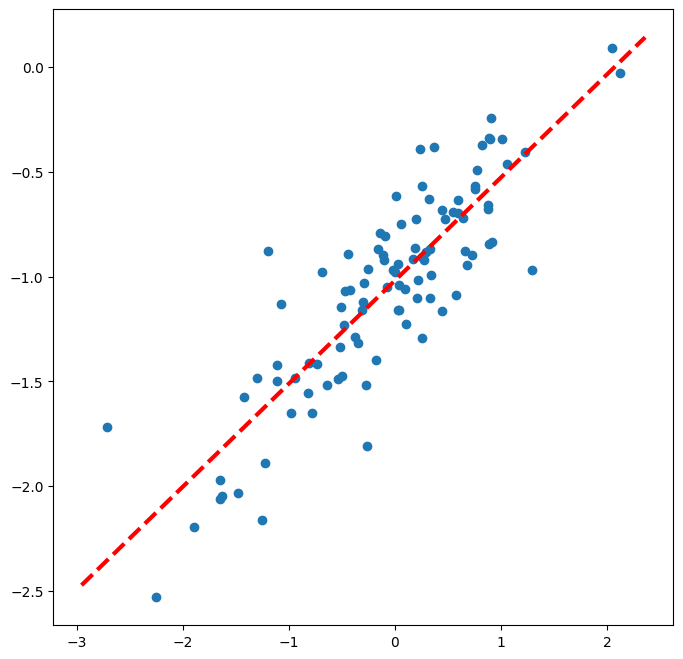

In [52]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x, y, marker='o')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

In [92]:
x2 = x**2
Xp = np.concatenate([X, x2.reshape(-1,1)], axis=1)
modelp = sm.OLS(y,Xp)
resultsp = modelp.fit()
summarize(resultsp)

,coef,std err,t,P>|t|
const,-1.0182,0.030,-34.186,0.000
x1,0.4916,0.032,15.562,0.000
x2,-0.0012,0.023,-0.052,0.959


## Question 14 (collinearity problem)

In [93]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

In [96]:
np.corrcoef(x1,x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

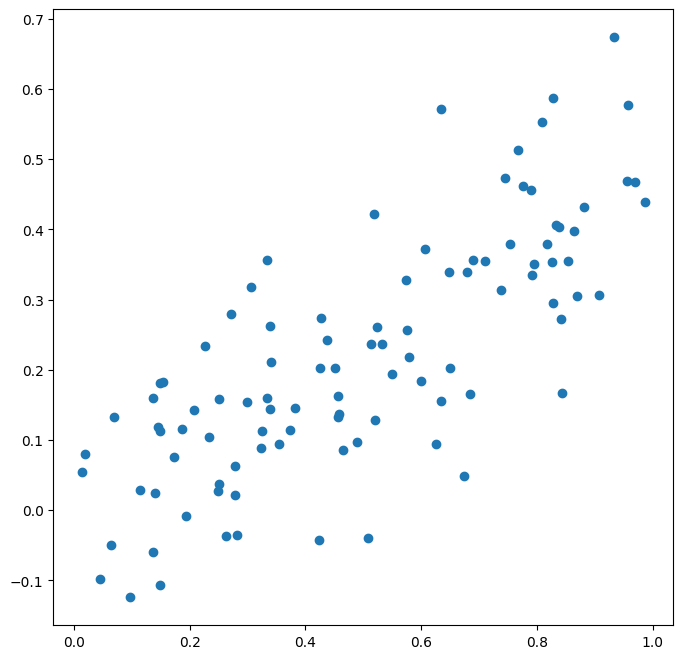

In [97]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x1,x2, marker='o')

In [103]:
X = pd.DataFrame({'intercept': np.ones(x1.shape),
                  'x1': x1, 'x2': x2})

In [105]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           5.76e-08
Time:                        15:10:07   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
Boston = load_data('Boston')

In [113]:
terms = Boston.columns.drop('crim')
y = Boston['crim']

In [114]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.03e-56
Time:                        15:15:40   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""